In [ ]:
#pip install bitarray ngram xxhash

In [ ]:
# from google.colab import drive
# drive.mount('/gdrive')
# libdir = '/gdrive/My Drive/Colab Notebooks/tlpprl2/libs/'

In [1]:
import sys
import os
import csv
import time
import datetime
import math

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# from bitarray import bitarray
# import ngram

# sys.path.append(libdir)

# from bloomfilter import *

In [23]:
# setting the axes at the centre
def plot_fx(x,y,log=False,eixo_x='x',eixo_y='y',titulo='',
            figs=None,step=.1,arredondamento_x=1,plot_optimum=False,
            cor='cornflowerblue'):
  if figs == None:
    fig, ax = plt.subplots()
  else:
    fig, ax = plt.subplots(figsize=figs)

  ax.plot(x,y, cor, label='' , linewidth=3.)
  ax.legend(loc='upper left')
  ax.set(xlabel=eixo_x, ylabel=eixo_y,
       title=titulo)

  if log:
    from matplotlib.ticker import FormatStrFormatter
    ax.set_yscale('log')
    
    # antigo
    # n_min = y.argmin()
    # ax.plot(x[n_min],y[n_min],'o',color='red',linewidth=5.)
    # ax.annotate('min='+str(x[n_min])[0:3], xy=(x[n_min],y[n_min]), xytext=(x[n_min]+.001,y[n_min]+.001))

    if plot_optimum:
      index_red = np.where(np.logical_and(x>=.45, x<=.55))
      # ax.plot(x[index_red],y[index_red],'red',linewidth=3.)
      ax.plot(.5,.01,marker="o", markersize=10,color='red')

    # ax.set_xscale('log')
    # x_ticks = np.arange(0, 1, 10)
    # ax.set_xticks(x_ticks)
    
    ax.grid(True, which="both", ls="-")
    
    ax.xaxis.set_major_formatter(FormatStrFormatter("%."+str(arredondamento_x)+"f"))
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))

  else:
    ax.grid()

# plot_fx(x,y,log=True,eixo_x='|k|',titulo='Ola', figs=(10,9))

In [8]:
def p_um(k,l,n):
  '''
    Probabilidade de um elemento do filtro ser 1
  '''
  top = -1 * ((k*n)/l)
  # the function, which is y = e^x here
  p_zero = np.exp(top)
  # p_zero = pow(math.e,top)
  return 1 - p_zero

p_um(1,920,96)

def fpr(k,l,n):
    return math.pow(p_um(k,l,n),k)

0.09908811773731951

# priv

In [14]:
# n_min = 
# index_red = np.where(np.logical_and(x>=.45, x<=.55))
# x[index_red]
    # ax.plot(x[n_min],y[n_min],'o',color='red',linewidth=5.)

In [35]:
def p_bigram_in_s(k,l,n,s):
    print(l/s)
    top = ((-k*n)/(l/s))
    # the function, which is y = e^x here
    p_zero = np.exp(top)
    return math.pow((1 - p_zero),s)


p_bigram_in_s(7,920,96,1)

0.38081292218546514
920.0


0.5183004900152096

In [58]:
def p_bigram_in_s(k,l,n,s):
  return math.pow(p_um(k,l,n),s)

print(p_um(2,920,96))
print(p_um(4,920,96))
print(p_um(7,920,96))
print(p_um(10,920,96))

p_bigram_in_s(7,920,96,2)

0.18835778039791418
0.3412369073593995
0.5183004900152096
0.6477725900072888


0.2686353979500064

Probabilidade no bf (orignal)

In [ ]:
#len(x)
# np.linspace(1/45,1,100)
# x/45.format()

44

Plota com a probabilidade f (false positive fixa) fixa

In [232]:
n_splits = np.array([2,4,8,16,32])
# n_splits = np.array([2,4,8])
ks = np.array([4,7,11,16])
# ks = np.array([3,7,16])

coluna_splits = []
coluna_k = []
coluna_px = []

for split in n_splits:
    px = np.array([p_bigram_in_s(k,920,96,split) for k in ks])
    
    coluna_px = coluna_px + list(px)
    
    for k in ks:
        coluna_k.append(p_um(k,920,96))
#     coluna_k = coluna_k + list(ks)

#     ss = [split] * len(ks)
    ss = [1/split] * len(ks)
    coluna_splits = coluna_splits + ss
        

df = pd.DataFrame({'splits': coluna_splits, 'fpr': coluna_k, 'px': coluna_px})

df.fpr = df.fpr.round(2)

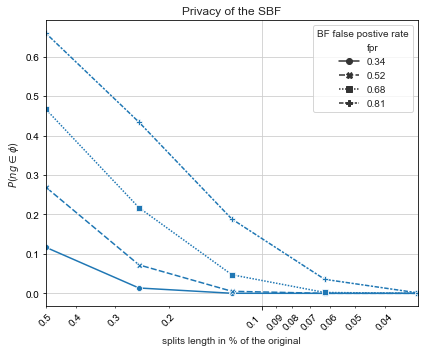

In [233]:
import seaborn as sns
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(6,5))
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
          
g = sns.lineplot(data=df, x="splits", y="px", style="fpr",
                 markers=True, dashes=True, ci=None,
                 ax=ax)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

# sns.despine(trim=True)


ax.set_title("Privacy of the SBF")
ax.set_ylabel(r"$P(ng \in \phi)$")
ax.set_xlabel("splits length in % of the original")
# ax.set(yscale="log")
ax.set(xscale="log")
ax.grid(True)

# ax.yaxis.set_minor_locator(mticker.FixedLocator([0.1,.2,.3,.4,.5]))


ax.xaxis.set_major_formatter(
    mticker.FuncFormatter(lambda y, _: '{:g}'.format(y))
)

ax.xaxis.set_minor_formatter(
    mticker.FuncFormatter(lambda y, _: '{:g}'.format(y))
)

for text in ax.get_xminorticklabels():
    text.set_rotation(45)

plt.legend(title='BF false postive rate')
plt.xlim(max(df.splits),min(df.splits))
plt.tight_layout()

fig.savefig('../results/figs/priv_sbf_rev_01.pdf')



In [82]:
# print(p_um(2,920,96))
# print(p_um(3,920,96))
# print(p_um(7,920,96))
# print(p_um(11,920,96))
# print(p_um(16,920,96))



# sns.lineplot(data=flights, x="year", y="passengers", hue="month")


# v_fun = np.vectorize(p_um)
# x = v_fun(x,920,96)
# plot_fx(x,y,log=True,eixo_x='$f$',eixo_y='$P(ng \in \phi)$',titulo=r'Privacy of the SBF',
#         plot_optimum=True,
#         figs=(7,6))

[16, 16, 16, 16, 16]

plota variando f

# Scratch

## original

In [14]:
def p_bigram_in_s(k,l,n):
  return math.pow(p_um(k,l,n),k)

p_bigram_in_s(7,920,96)

0.010047808192968098

No handles with labels found to put in legend.


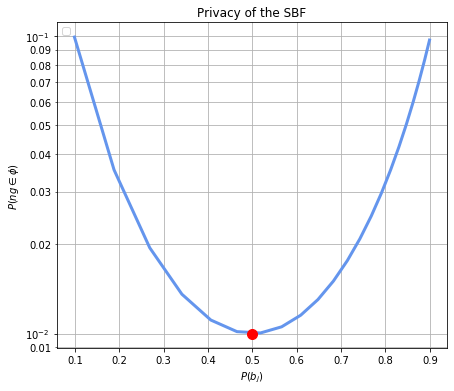

In [24]:
x = np.arange(1,23,1)
y = np.array([p_bigram_in_s(xi,920,96) for xi in x])

v_fun = np.vectorize(p_um)
x = v_fun(x,920,96)
plot_fx(x,y,log=True,eixo_x='$P(b_j)$',eixo_y='$P(ng \in \phi)$',titulo=r'Privacy of the SBF',
        plot_optimum=True,
        figs=(7,6))

## Old

In [ ]:
def p_bigrams_in_s(k,l,n,s_percentage):
  s =  int(l*s_percentage)
  # print(s)
  # return 1 - math.pow(p_bigram_in_s(k,l,n),int(s/k))
  # return 1 - math.pow(p_um(k,l,n),s)
  return 1 - np.power((1 - np.exp((-k*n)/s)),(s/k))

p_bigrams_in_s(7,920,96,.011),p_bigrams_in_s(7,920,96,.0025),p_bigrams_in_s(7,920,96,.1)

(0.0, 0.0, 0.008803981432802144)

No handles with labels found to put in legend.


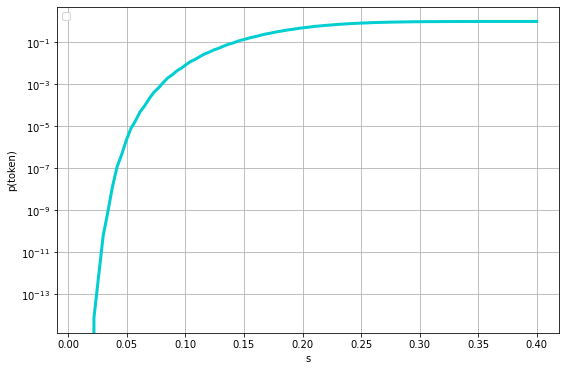

In [ ]:
x = np.linspace(0.01,.4,100)
y = np.array([p_bigrams_in_s(7,920,96,xi) for xi in x])
# x = 96 * x
plot_fx(x,y,log=True,eixo_x='s',eixo_y='p(token)',
        arredondamento_x=2,
        figs=(9,6))

In [ ]:
def p_bigrams_in_varphi(k,l,n,s_percentage,parties)

In [ ]:
# MOVIES 9 PARA 7
entradas = [('bike/beer',920,7,96),('books',2456,8,256),('eletronics',9816,10,1024),('movies',7360,7,768),('music',9816,10,1024),('restaurants',1224,7,128)]
ps = 0.05

_out = []
for caso in entradas:
  scenario = caso[0]
  l = caso[1]
  k = caso[2]
  n = caso[3]
  s = int(l*ps)
  n_bigrams= int(s/k)
  mean_bigrams = caso[3]
  _out.append({'scenario':scenario,
                'l':l,
                'k':k,
                's':s,
                'bigrams_in_s':n_bigrams,
                'mean_bigrams_in_ds': mean_bigrams
               })

df = pd.DataFrame(_out)
df['p'] = (df.bigrams_in_s / df.mean_bigrams_in_ds) 
df.round(2)

,scenario,l,k,s,bigrams_in_s,mean_bigrams_in_ds,p
0,bike/beer,920,7,46,6,96,0.06
1,books,2456,8,122,15,256,0.06
2,eletronics,9816,10,490,49,1024,0.05
3,movies,7360,7,368,52,768,0.07
4,music,9816,10,490,49,1024,0.05
5,restaurants,1224,7,61,8,128,0.06


## Novas metricas

In [ ]:
def encryptData(data,size,fp=0.01,n=2,bpower=8,p=None):
    """
        n : 2 = Bigrams
        size : Size of BF
        fp : False positive rate
    """
    bloomfilter = BloomFilter(size,fp,bfpower=bpower)
    if p != None:
        bloomfilter.set_hashfunction_by_p(p)

    index = ngram.NGram(N=n)
    bigrams = list(index.ngrams(index.pad(str(data))))
    print(bigrams)

    for bigram in bigrams:
        bloomfilter.add(str(bigram))

    return bloomfilter

In [ ]:
def entropy_coefficient(filter1 , filter2, base=2):
    """ 
        Calculates the entropy coeficiente of the two underlyng bloom filter.
        
        filter1 : crypto.mybloom.bloomfilter
        filter2 : crypto.mybloom.bloomfilter
        
        return : number between 0 and 1
    """
    
    
    if (type(filter1) is NullField) or (type(filter2) is NullField) :
        return 0 
    
    total_count = int(filter1.bit_size)
    
    f1_element_count = filter1.filter.count(True)
    f2_element_count = filter2.filter.count(True)
    
    prob_f1 = f1_element_count / total_count
    prob_f2 = f1_element_count / total_count
    
    
    e_f1 = -1.0 * total_count * prob_f1 * math.log(prob_f1) / math.log(base)
    e_f2 = -1.0 * total_count * prob_f2 * math.log(prob_f2) / math.log(base)
    
    entropy =  abs(e_f1 - e_f2)

#     for element_count in Counter(data).values():
#         p = element_count / total_count
#         entropy -= p * math.log(p, self.base)
        
    assert entropy >= 0
    
    return 1 - entropy

In [ ]:
#beer 96, lpower=256
# plotResult('beer', 'sample-candset.csv', [1,3,4] , [2,5,6])
# plotResult('bikes', 'candset.csv', [3,4,7] , [8,9,12])
# plotResult('books1', 'candset.csv', [1,3,4,5] , [2,6,7,8],size=256)
# plotResult('eletronics', 'sample-candset.csv', [1,4,5,3] , [2,6,7,8], size=1024)
# plotResult('movies1', 'candset.csv', [1,3,4,5] , [2,6,7,8],size=768)
# plotResult('music', 'sample-candset.csv', [2,4,5,6,7,8,9] , [3,10,11,12,13,14,15],size=1024)
# plotResult('restaurants1', 'sample-candset.csv', [1,3,4,5] , [2,6,7,8],size=128)


## Testes

In [ ]:
e1='A'
bf1 = encryptData(e1,128)
#bf1.filter, 
bf1.capacity , bf1.bit_size , bf1.hash_functions

['$A', 'A$']


(128, 1224, 7)

In [ ]:
e1='A'
e2='ANE'
bf1 = encryptData(e1,2)
bf2 = encryptData(e2,8)

['$A', 'A$']
['$A', 'AN', 'NE', 'E$']


In [ ]:
import xxhash
for seed in range(bf1.hash_functions):
    print(xxhash.xxh64('$A', seed=seed).intdigest() % bf1.bit_size )

14
5
0
3
5
3


In [ ]:
bf1.filter.count(1)

8

In [ ]:
7360/(9*0.01)

In [ ]:
## Testes metricas

81777.77777777778